In [77]:
%matplotlib inline
from collections import Counter
from collections import defaultdict
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import plotly.plotly as py

In [12]:
data = pd.read_csv('techcrunch_posts.csv')
orgs = pd.read_csv('organizations.csv')
people = pd.read_csv('people.csv')

In [13]:
cat_start_data = data[data['category'] == 'Startups']

### TODO:
- Create time series graph of "hype/PR"
- Extract company names and group them with their respective posts
- Create sentiment analysis on each post within the company group
- Graph the sentiment analysis against outcome (if exists) "funded/exits/failures"

In [14]:
df = pd.DataFrame(cat_start_data)

In [15]:
def extract_nouns(content, thresh, draw_plot):
    if content == "":
        print ("Content is empty...aborting")
        return
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = nltk.word_tokenize(content)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    noun_counts = Counter(nouns)
    nc_thresh = thresh
    nc_df = pd.DataFrame.from_dict(noun_counts, orient='index')
    #nc_df = nc_df.sort(columns=0, ascending=False).iloc[0:thresh]
    nc_df = nc_df.sort_values(by=0, axis=0, ascending=False).iloc[0:thresh]
    #nc_df = nc_df[nc_df[0] >= thresh]
    if draw_plot: nc_df.plot(kind='bar');
    return nc_df

Content is empty...aborting


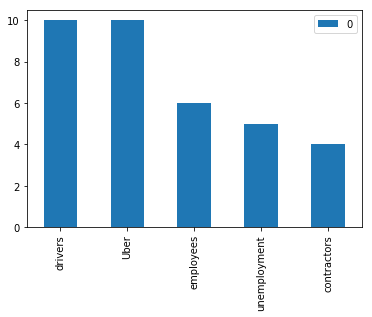

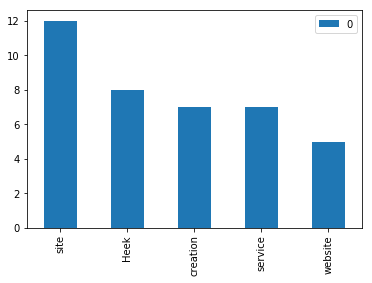

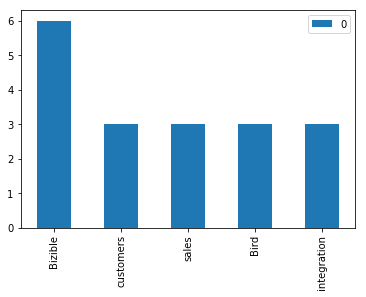

In [16]:
# Generalize, examples of startup features articles contents
df1 = extract_nouns(cat_start_data.loc[4]['content'], 5, True)
df2 = extract_nouns(cat_start_data.loc[428]['content'], 5, True)
df3 = extract_nouns(cat_start_data.iloc[1456]['content'], 5, True)
test = extract_nouns("", 5, True)

In [17]:
# Use either crunchbase or angelist API 
# to match nouns with company names

In [18]:
def get_companies(nouns):
    comp_names = [name for name in nouns.index.values if (orgs['name'].isin([name]).sum() == 1)]
    return comp_names

In [19]:
"""
Used to create a dictionary that's indexed by a company and accumulates
a table of posts referencing the company

Input: int thresh - the top 'thresh' noun references to
"""
def create_posts_index(thresh):
    # Flag for drawing noun freq plot of post
    draw_plot = False
    comp_dict = defaultdict(pd.DataFrame)
    empty_content = []
    
    for index, rows in data.iterrows():
        try:
            nouns = extract_nouns(rows['content'], thresh, draw_plot)
        except (TypeError, KeyError) as e:
            print(e, " occured at index: ", index)
            #print("Recorded: post indexed at ", index, " has an error with its content")
            empty_content.append(index)
        comp_names = get_companies(nouns)
        for comp in comp_names:
            comp_dict[comp] = comp_dict[comp].append(data.loc[index])
    
    return comp_dict, empty_content

In [20]:
[company_post_dict, empty_content] = create_posts_index(5)

expected string or bytes-like object  occured at index:  823
expected string or bytes-like object  occured at index:  1427
expected string or bytes-like object  occured at index:  1456
0  occured at index:  2163
0  occured at index:  2219
expected string or bytes-like object  occured at index:  2511
expected string or bytes-like object  occured at index:  2546
0  occured at index:  2806
0  occured at index:  2831
expected string or bytes-like object  occured at index:  2978
expected string or bytes-like object  occured at index:  3028
expected string or bytes-like object  occured at index:  3285
expected string or bytes-like object  occured at index:  3591
expected string or bytes-like object  occured at index:  3675
expected string or bytes-like object  occured at index:  3712
expected string or bytes-like object  occured at index:  3762
expected string or bytes-like object  occured at index:  3780
expected string or bytes-like object  occured at index:  3837
expected string or bytes-

In [21]:
# Writing the company_post_dict to file for easy load

In [314]:
def find_csv_filenames(path_to_companies, ext=".csv"):
    filenames = listdir(path_to_companies)
    return [filename for filename in filenames if filename.endswith(ext)]

In [315]:
def create_safe_filename(filename):
    # / --> _
    # . --> +
    name_acc = filename
    if '/' in filename:
        name_acc = name_acc.replace('/', '_')
    if '.' in filename:
        name_acc = name_acc.replace('.', "+")
    return name_acc

In [316]:
def revert_safe_filename(filename):
    name_acc = filename
    if '_' in filename:
        name_acc = name_acc.replace('_', '/')
    if '+' in filename:
        name_acc = name_acc.replace('+', '.')
    return name_acc

In [317]:
def save_all_companies(company_post_dict, path_to_data_folder):
    for comp, posts in company_post_dict.items():
        safe_comp_name = create_safe_filename(comp)
        print (safe_comp_name)
        posts.to_csv(path_to_data_folder+safe_comp_name+".csv", sep=',')

In [318]:
def load_all_companies(path_to_companies):
    comp_dict = defaultdict(pd.DataFrame)
    filenames = find_csv_filenames(path_to_companies)
    for filename in filenames:
        comp_key = filename.split(".")[0]
        print (comp_key)
        reverted_name = revert_safe_filename(comp_key)
        comp_dict[reverted_name] = pd.read_csv(path_to_companies+filename, index_col=0)
    return comp_dict

In [319]:
save_all_companies(company_post_dict, "./companies/")

Propstack
News+me
BrightPoint
GenieDB
Hadopi
Stratos
Scoutmob
Placemeter
Dremel
Axiata
Djump
OnePageCRM
Framebench
RapidMiner
Parallels
TapSense
Nuzzel
Benchmark
Blackphone
Themer
Telegram
MovieLaLa
Pitch
Sensorberg
Ossia
BillGuard
Miradore
Porch
StartupBus
CapRally
Algolia
BevSpot
Netflix
Founder2be
Shippable
Regalii
Matchbook
uMake
AppSurfer
Yotpo
Makeshift
Hotspots+io
SalesforceIQ
Nestivity
Harris
HarperCollins
cloudControl
Atmotube
SproutCore
Zymergen
M7
Dwolla
Breather
Hinge
ipsy
Letterboxd
Kaplan
WhatRunsWhere
WatchDox
ScoreBeyond
Glow
Rapid7
FreeCharge
Your
Kabbee
Costa
Poynt
Gamify
MediaSpike
Mandarin
Spotify
Lawdingo
GateGuru
SugarSync
LMS
GrowSumo
Toothpick
LookFlow
Zeemi+tv
Exec
AfterCollege
Peeple
SimpliVity
Quik
CloudBees
HipChat
Fontacto
GetSet
Torque
Pantry
MariaDB
Tailwind
Odyssey
Sullivan
Explorer
FarFaria
Apica
Rosetta
LifeLock
Freshplum
AirMap
Bark
TrustedCompany+com
Yammer
NewVoiceMedia
Mann
AAA
Wakie
WEVR
Parachut
Streak
Ondango
Carmudi
Evertale
AptDeco
Fab
Tailor


Lavabit
Uniplaces
Affirm
TripAdvisor
AppFog
Gobstopper
CollegeBudget
Bebo
MSN
Joyable
Magenta
Xigo
Hound
Menulog
BitWall
Viadeo
SyndicateRoom
Olery
Nextpeer
VideoSelfie
Force
iwoca
Tiiny
Friendsy
myTomorrows
Impermium
Blippy
LogMeIn
iFetch
Givey
Airlike
SimpleHoney
Tastemade
PEN
Gaikai
Altiscale
Muve
PushPage
DueDil
BufferBox
NumberFour
Shark
Nexon
Carousel
Z
Georama
Nokia
PRX
AppCertain
THB
GMT
Fleex
Browning
Newton
JustBook
Pick
BarkBox
Teleza
Sourcebits
Neyya
Compute
Moglue
Moment+me
Osmo
Monday52
Hunter
Drivemode
grasp
Espacio
Ayannah
eGood
YesGraph
Top10
Sonicbids
Politix
mBank
Blottr
ContainerShip
SnappyLabs
Lendingkart
Orange
Luxe
Interactive
Divshot
Detour
TuneUp
Flips
Glose
ARTIK
Linea
NewzSocial
Genera
Evidence+com
Wonga
Target
SlickFlick
DuckDuckGo
Weekly
Esri
Cal
NAD
JustWatch
UserVoice
Neuron
Outfit7
BrightRoll
SpaceX
Flixster
SocialMart
Keywee
StoryDesk
Tapstream
Visier
Spinlister
Netbiscuits
Appboy
Zipmark
Cedexis
Alfred
Sidebark
Rothschild
SiteScout
SweetLabs
shopkick
R

PunchTab
NHS
Cyanogen
ShipStation
Credible
Proto+io
keychain
Modbot
Meetup
Donde
CodinGame
Mobilewalla
Thumbtack
Battlefield
Sqreen
Taplister
tenXer
Tapit
Opbeat
Woollip
TouchTen
LiftDNA
PumpUp
Ahead
Her
Tracxn
PlayHaven
JobVidi
Maker
NewsWhip
Collaaj
TweetDeck
Collect
Pivotal
Saber
Decide
BitPay
Toolbox+com
Industrie
Workshop
LetsWombat
Winamp
Mantis
King+com
Tapvalue
Blackboard
Routific
Frrole
Accounts
Cenzic
HeyLets
Moasis
GoGoGrandparent
Amazon
Infinite+ly
Looksee
Neura
Livongo
ReadyForZero
Samson
Speedo
Audiodraft
Elephanti
Proxy
Luminox
Teal
MixBit
Jajah
Hungryroot
Retrofit
Conversation
Energy
Guys
Haier
FarmLogs
FwdForce
Thanx
JackThreads
DJI
Doorman
Tagwhat
Komprise
Mouawad
Bankons
eReader
Blue
Dish+fm
Kippt
Betfair
Tykoon
Redkite
Discourse
OhMiBod
Gratafy
Roomer
GREE
Get+com
EyeTrackShop
Jobvite
Simplee
Vidme
Memories
TetraScience
Pastebin
JustGiving
Virool
MobStac
DBX
Dashlane
Workspot
LogDog
Infomedia
DataCamp
Perpetu
Locu
Zipments
Dónde
Marblar
Darktrace
Undrip
Inneractive


MobiTV
Hivemapper
AppFirst
BloomReach
NoshList
JANDI
Luff
seed
AddSearch
SimilarTech
Adzuna
Cloudike
Talend
Unreel+me
Plugaway
Curioos
Aoliday
E3
PagerDuty
Quikr
GraphOn
OpenSignal
FunderCloud
LoopFuse
KashFlow
Frameri
aCommerce
Gigya
Docurated
gumi
Path+To
Bebop
Endorse+me
Lookup
Yamaha
BlazingDB
Telenor
SharesPost
Vertro
Creandum
Whirlscape
Spreaker
REBBL
Fantoo
MiMedia
Freeman
Percolate
Lifecake
Avon
Moodstocks
Kindly
Snackr
Vingle
Azalead
Workday
Fortify
Deem
Shelf
Travis
Rythm
StackMob
Azumio
InstallMonetizer
SwiftGift
Wit+ai
DataStax
imoji
Strap
Levi’s
AmazonFresh
Ketchuppp
Automatic
GiftCards+com
Ventoura
Quandoo
inMarket
Lumus
Voyagin
Nosto
Diveboard
Ting
CodeCombat
Audible
Captora
Qype
Mozio
Wordeo
SprinkleBit
Quikkly
Glancee
JuicyCanvas
Sony
Postwire
eFounders
IRIS
Sociocast
Washio
Gone
Dispop
Cheerboo
Tutorspree
Embrace
Bucket
Timeline
Luminate
BetaNoodle
Forage
Boxer
Lettuce
Soluto
Gravie
Conyac
CoreOS
Autos
Pixel
Influitive
Appcues
Women+com
Mondo
Shopgate
Airpaper
StartAp

MetaMind
Unruly
Giftiki
Locca
Pressfolios
Lexity
Graduway
Echograph
Kaggle
Vobi
Crushpath
Drupal
Polyvore
Triller
DailyWorth
SAP
Maxthon
Housejoy
Tyro
Apphance
Fanatics
BioDigital
Jewelbots
Quri
Vinebox
eShares
BBVA
Coupang
SoftBank
Gleam
Spredfast
Koality
Seamless
Insight
GetLinks
Academe
AnchorFree
Anywhere
Eyeview
Vizury
FoundersCard
Povio
MoPho
Gizmox
PeopleBrowsr
Roca
Spectrm
PromoJam
Animoto
Loosecubes
Gumhouse
Plaid
Kepler
Morrisons
Reactions
Lucey
Impraise
International
Secusmart
AVG
Wileyfox
Fotolia
Inspirato
Dreamit
Muzik
PicMonkey
Geeksphone
Dymant
Futuremark
EPIX
BlockTrail
Emburse
Noke
Bump
Photomyne
Sapho
Wonderloop
Clustrix
DigitalGenius
Makerbase
CloudSpokes
iQiyi
Blockchain
Odnoklassniki
Loggly
Famigo
SittingAround
SquareOne
Yield
MindSnacks
Playlists+net
Cvent
Highrise
Liftopia
Axway
UPS
Metrics
Chute
SigOpt
Clippet
Vaavud
Phonvert
Legentas
Haptik
Hotspot
Intel
Affectiva
LegbaCore
RakNet
Metail
Judicata
Fatmap
Azullo
Widdit
Lamoda
Transcoder
Foodzy
Ideal
Systems
Auxmo

RTI
Xiaomi
TuneIn
Olson
XPRIZE
Donut
HelloSoda
Pattern
Foundation
TappingStone
Stamped
Tout
Floret
UpTo
JVP
IPG
Storybricks
Guvera
EVA
Okta
TradeGecko
Telstra
Farfetch
Zello
Instavest
Lion
QR
Wantful
Spoolee
Lolapps
ExoClick
Curatum
Workato
Tectonic
XSEDE
LeFeed
VHX
SnapKnot
indoo+rs
PMA
Picks
AppsBuilder
CrestaTech
Cloudant
Indie
Decorist
TSMC
Pickie
PARC
Shuddle
Immediately
Upworthy
Likelii
LeKiosk
Autodesk
Sportradar
Gradberry
Seesmic
Soompi
GazeHawk
Boxever
Sprightly
Recombine
Yeti
Kryptnostic
Tictail
Seesaw
Issue
Vungle
Nickelodeon
Zumper
Nearby
Made
GroupSpaces
Roomorama
Woozworld
VitaPortal
WearToday
Batterii
FarEye
FindIt
Jolicloud
SIMI
vrAse
NodeFly
Baarzo
Soli
Remus
Minted
Velostrata
Bud
TrackR
Guild
Dyson
PCI
Stypi
Request
PadMapper
Online
StudyBlue
Canal+
Terminal
SocialChorus
Pressly
Promoboxx
Glassdoor
Scosche
Aarki
StartupHighway
Gaana
Bellabeat
Symantec
Trustev
Caterspot
Gobble
Modi
Treasure
Adly
Tapdaq
LEAGUE
M+dot
CentOS
Noodle
NetSuite
Threes
Skimbox
Action
Coinsette

In [320]:
dic = load_all_companies("./companies/")


42Floors
A
AAA
Aardvark
Aarki
AB
ABI
Abine
Ableton
about+me
About
ABS
Academe
Academia
Acano
Accel-KKR
Acceleprise
Accelerator
Accellion
Accenture
Accomable
Accompany
Accounts
Aceable
Acer
Achievers
Aclima
aCommerce
Acompli
Acorns
Acquia
Acronis
Actifio
Actility
Action
ActivePath
AcuityAds
Acunote
Adafruit
Adaptive
AdBlock
adBrite
Adcade
AdColony
Addr
AddSearch
AddThis
AddToAny
Addventure
Addvocate
Adelphic
AdEspresso
Adform
Adictik
Adidas
Adioso
Adly
AdMob
AdMobius
Adnimation
Ador
AdQuantic
AdRoll
AdSemble
AdsNative
AdStack
AdStage
ADstruc
ADTRAN
Adventr
AdVine
Advise+me
AdYapper
Adyen
Adzerk
Adzuna
Aereo
Aerospace
AetherPal
Aetna
Afero
Affectiva
Affinity
Affirm
Aframe
Afrostream
AfterCollege
AfterShip
Aggregift
AgileZen
Aging2+0
AgLocal
Agogo
Agorize
Agrilyst
Ahalogy
Ahead
AHHHA
Aidin
AIM
AIR
Airbnb
Aircall
AirConsole
AirHelp
Airlike
AirMap
Airobotics
AirPair
Airpaper
AirPooler
AirPR
Airpush
Airtame
Airtime
Airwallex
Airware
AirWatch
Airy
Aislelabs
Akeneo
Akimbo
AKQA
Aktana
Alaris
A

CodinGame
Cody
Coffee
CoffeeTable
CoFoundersLab
Coin
Coinbase
Coinfloor
Coinsetter
CoinTent
Cola
Coles
Coliloquy
Colingo
Collaaj
CollabFinder
CollabNet
Collabspot
Collect
Collection
Collections
CollegeBudget
Collins
colors
colourDNA
Columbus
Combinator
Comcast
Comet
Comma
Comment
Commerce
CommonBond
CommonFloor
CommonKey
Commonred
Commons
Comparably
CompareAsiaGroup
Compendium
Compilr
ComplyAdvantage
Compose
CompStak
Comptel
Compute
comScore
Comunitee
Conceivable
Concert
Concierge
Concurrent
Cone
Conferize
Confide
Confluence
Confluent
conichi
Connectifier
Connectify
Connector
Connexity
ConsenSys
Conspire
ConsultingMD
Consumr
Contactually
ContainerShip
Contastic
Contentful
Contently
Context
Contextly
conTgo
Contour
Control
Convercent
Conversation
Converser
Conversocial
Convies
Convoy
Conyac
Cookening
CoolaData
Cooliris
Cooper
CoPromote
Cor
Coraid
CoreOS
CorFire
Corgi
Corner
CornerJob
Corona
Cortica
Costa
Costello
Cosy
Cotap
Cotendo
Cotopaxi
CoTweet
Coub
Couchbase
CouchCommerce
Coull
Cou

Giphy
Git
GitHub
GiveMeSport
GiveMeTap
Givey
Givit
Gizmox
Glance
Glancee
Glassbreakers
Glassdoor
Glasses
GlassesGroupGlobal
Glassmap
GlassUp
Gleam
GLG
Glide
Gliffy
Gliimpse
Glimpse
Glints
Glitter
GlobalSCAPE
GlobalSign
Globant
GlobeIn
Globevestor
Glocal
Glooko
Glopho
Glose
Glossier
Glovo
Glow
Glowforge
Gluster
Glympse
Glyph
GMT
GMV
Gnip
Gnzo
Go-Jek
GO1
Goalbook
GOAT
goBalto
GoBank
Gobble
Gobi
Gobstopper
GoCardless
GoDaddy
GoEuro
GoGoGrandparent
Gogolook
Gogoprint
Gogoro
GoGoVan
GoingOn
GoInstant
Gojee
Goldbely
Goldee
GoldieBlox
Goliath
GoMiles
Gone
GoodData
Goodreads
GoodRx
Goodservice
Goodsie
Google
Google_
GoPollGo
GoPro
GOQii
Gorgias
Gorilla
GoSquared
Got
GoTenna
Gotham
Gousto
Gowalla
Goxip
Gozaik
GrabCAD
Grabio
Grabr
Grabyo
Gradberry
Grades+io
GradFly
Gradifi
Gradle
Graduateland
Graduway
Graham
Grapeshot
Graphicly
GraphOn
grasp
Grasshopper
Grasswire
Gratafy
Gravie
Gravitant
Gravity4
Greatist
Greats
GREE
Greedy
Greenfield
Greenhouse
Greenstart
Greenwood
Greta
Greyloft
GreyOrange
GRI

LovePalz
Lover+ly
LoveThis
Loyalize
LS9
LSTN
Lucent
Lucey
Lucky
LuckyPennie
LuckyTrip
Ludei
Luff
Lugg
Luka
Lully
Lumens
Lumenus
Lumi
Luminate
Luminoso
Luminox
Lumoid
Lumosity
Lumus
LUUV
Luvocracy
Luxe
Lybrate
Lydia
Lyft
Lyst
LyteShot
Lytro
M+dot
M+Gemi
M-Files
M2M
M4JAM
M7
Macbeth
Mach
Machine
Macmillan
Macro
MacroFab
Made
Madefire
Maderight
Madison
Madvertise
Magenta
Magento
Magic
Magine
Magna
Magnify
Magzter
Mahalo
Maheswari
Mail
Mailbird
Mailbox
Mailgun
Mailjet
Maily
Main
MakeGood
MakeMeReach
Maker
Makerbase
MakerBot
Makers
MakersKit
Makeshift
MakeSpace
MakeTime
Maluuba
Malwarebytes
Mambu
ManageFlitter
ManageIQ
Management
Mandarin
Mandiant
Mandriva
Mango
Mangrove
Manilla
Mann
Manpacks
Mantaphrase
Mantis
Mapbox
Mapillary
MapMyFitness
Mapstr
Marakana
Marblar
Marco
Marfeel
marGenius
Margo
MariaDB
Marino
Maritz
mark
MarkaVIP
Markerly
market
MarketMeSuite
Marketo
Marketplace
Marketwired
Markforged
Marriott
Mars
Marsh
MartJack
Marvel
Mashable
Mashape
Mashburn
Mashery
MassChallenge
Massdro

Polo
Polycom
Polymer
Polyvore
Poncho
Pond5
PonoMusic
Pop
Popcorn
Poppin
Pops
Popset
Poptip
Populis
Porch
Pornhub
Porsche
Portfolium
Poshmark
Posmetrics
Posse
Postable
Postcard
Posterous
PostGhost
Postgres
Posthaven
Postini
Postman
Postmaster
Postmates
PostRocket
PostUp
Postwire
Pounce
Povio
PowaTag
PowerInbox
PowerPoint
PowerReviews
Powerset
Powhow
Poynt
Pozitron
PPI
Practo
Prakash
Preact
PreApps
PrecisionHawk
PredictionIO
Predictive
PredictSpring
Predix
Prefundia
Premier
Prenetics
PrePay
PrePlay
PrepWork
Presence
Press
Pressfolios
Pressly
PrestaShop
Prete
Prevent
Prezi
Price
Priceonomics
Priest
Prim
PrimeSense
Print+io
Print
Printful
Printhug
Printoo
Prior
Privacy
PrivacyStar
Privalia
PrivateCore
Prize
Prizeo
Pro+com
ProBoards
Procera
Procured
Producteev
Profig
ProfitBricks
ProFounder
Progressly
Promoboxx
PromoJam
Promote
Prompt+ly
Property
Propstack
PROskore
Protag
Protect
Proto+io
ProtonMail
Proud
Provender
Providence
providers
Prowl
Proxy
Prss
PRX
Prysm
Pryte
PSafe
PSG
PTT
Public
P

Startupbootcamp
StartupBus
StartupDigest
StartupHighway
Startupi
Startups+co
Startups
StartupYard
StartWire
StartX
Starwood
State
Station
StatMuse
StatusPage
Statwing
Stauffer
Stay+com
Stayzilla
SteelBrick
SteelHouse
SteelSeries
Steinberg
StellaService
Steller
Stepes
Stephens
Stevie
STI
Stichy
Stick
Stickam
Stickers
StickNFind
Sticky
Stik
Stingray
Stipple
Stir
Stitcher
Stocard
Stocksy
StockTwits
Stone
Stonesoft
StopTheHacker
StoreDot
storefront
Storify
Storm8
StormTag
StorSimple
StoryBox
Storybricks
Storycode
StoryDesk
Storyful
Storylane
StraighterLine
Strap
Strata
Stratasys
Stratos
Stratumn
Strava
Strayboots
Streak
Streamroot
Streamweaver
Streem
StreetEasy
Streetlife
Streetline
StrikeAd
Stringr
Strings
Stripe
StrongLoop
Structure
Struq
Stuart
Stubb
StubHub
Studios
StudyBlue
Studypool
StudyRoom
Stuffle
StumbleUpon
Stupeflix
StyleCard
StyleCaster
Stylect
StyleSeat
StyleSeek
StyleTread
Stylight
Stypi
Submittable
SubPac
Subway
SugarCRM
SugarSync
Sugru
Suite
Suiteness
Sullivan
SumAll
Summa

Wrap
Wrapify
Wrapp
Wriggle
Wrike
Written
WrkRiot
WudStay
Wufoo
Wurldtech
wydr
Wynd
x
xAd
Xamarin
XEED
Xeneta
Xero
Xeround
Xetum
Xfers
Xfire
Xi3
Xiaomi
Xigo
XING
Xirrus
XO
Xola
Xperia
Xpire
XPRIZE
XSEDE
Xunlei
Xyo
XYZE
XYZprinting
Yahoo
Yamaha
Yamli
Yammer
Yapp
Yardsale
Yarly
Ybrain
YCharts
Yell
Yelp
Yemeksepeti
YesGraph
YesVideo
Yesware
Yetang
Yeti
Yext
Yield
Yieldify
YieldKit
Yo
Yobongo
Yodlee
Yoga
YogiPlay
Yohann
Yoics
Yoke
Yondr
York
Yoshi
Yotpo
Yottaa
YouAppi
YouEye
Youku
YouLike
YouMagine
Youmiam
YouNoodle
YouNow
Your+MD
Your
YourBus
YourSports
YourTrove
YouTube
YouTurn
YouView
Youzee
Yoyo
Yozio
YP
YPlan
Yumist
Yunmake
Z
Z2
Z4
Zaarly
Zabosu
Zamurai
Zap
Zapier
Zappli
Zappos
ZappRx
Zattikka
Zayo
Zazzle
Zazzy
Zebra
Zedge
Zeekit
Zeel
Zeemi+tv
Zeetings
ZEFR
Zello
Zemanta
Zen
Zen99
Zenamins
ZenDeals
Zendesk
Zenefits
Zenoti
Zenprise
Zentyal
Zeo
Zeplin
zero
ZeroCater
ZestFinance
Zhaopin
Zhenai
Zidisha
ZigBee
Zilingo
Zillabyte
Zillow
Zimbra
Zimperium
Zimride
Zinc
Zingaya
Zipcar
ZipList
Zip

In [321]:
company_post_dict['Google']

,authors,category,content,date,id,img_src,section,tags,title,topics,url
23,Devin Coldewey,Artificial Intelligence,"Want Google Assistant, but don’t want to spend...",2016-10-12,1401019.0,https://tctechcrunch2011.files.wordpress.com/2...,mobile/,google-assistant,Add Google Assistant to your phone by tweaking...,android,https://techcrunch.com/2016/10/12/add-google-a...
26,Frederic Lardinois,Apps,"With Android Experiments, Google is giving its...",2016-10-12,1400778.0,https://tctechcrunch2011.files.wordpress.com/2...,mobile/,app,Google’s new Sprayscape app is purposely imper...,google,https://techcrunch.com/2016/10/12/spray-and-pray/
30,Sarah Perez,Mobile,Apple has unveiled its own official measuremen...,2016-10-11,1399959.0,https://tctechcrunch2011.files.wordpress.com/2...,mobile/,NaN,"According to Apple’s official figures, iOS 10 ...",apple,https://techcrunch.com/2016/10/11/according-to...
39,Devin Coldewey,Artificial Intelligence,"Want Google Assistant, but don’t want to spend...",2016-10-12,1401019.0,https://tctechcrunch2011.files.wordpress.com/2...,gadgets/,google-assistant,Add Google Assistant to your phone by tweaking...,android,https://techcrunch.com/2016/10/12/add-google-a...
67,John Mannes,Media,Today Google added a new “fact-check” tag to i...,2016-10-13,1401551.0,https://tctechcrunch2011.files.wordpress.com/2...,social/,"blog,google-search,world-wide-web,digital-media",Google starts highlighting fact-checks in News,NaN,https://techcrunch.com/2016/10/13/google-helps...
130,Darrell Etherington,Gadgets,Google’s new hardware is getting a Google-owne...,2016-10-07,1398633.0,https://tctechcrunch2011.files.wordpress.com/2...,gadgets/,NaN,Google’s self-made hardware is getting a pop-u...,google,https://techcrunch.com/2016/10/07/googles-self...
160,Jon Russell,Asia,Google today announced a collection of updates...,2016-09-27,1392811.0,https://tctechcrunch2011.files.wordpress.com/2...,asia/,"india,connectivity,emerging-markets",Google expands its initiative to provide free ...,google,https://techcrunch.com/2016/09/27/google-stati...
195,Darrell Etherington,Artificial Intelligence,"Google unveiled a lot of new devices today, bu...",2016-10-04,1396920.0,https://tctechcrunch2011.files.wordpress.com/2...,gadgets/,"google-pixel,smartphones","Google’s new smartphones are about Google, not...",google,https://techcrunch.com/2016/10/04/googles-new-...
196,Brian Heater,Gadgets,Sometimes it’s best to just sit back and feign...,2016-10-04,1396518.0,https://tctechcrunch2011.files.wordpress.com/2...,gadgets/,"googlepixel,googlehardware,googlehardware2016",Here’s the Google Pixel,NaN,https://techcrunch.com/2016/10/04/google-pixel/
208,Josh Constine,Apps,If you combined the fastest and slowest types ...,2016-09-26,1392519.0,https://tctechcrunch2011.files.wordpress.com/2...,social/,NaN,"If Google buys Twitter, there’s a perfect spot...","youtube,google,twitter",https://techcrunch.com/2016/09/26/youtweet/


In [322]:
# Error checking against generated company lists
for key in company_post_dict:
    if key in dic:
        pass
    else:
        print ("Not found in dic: " + key)

Not found in dic: FoodChéri
Not found in dic: egg
Not found in dic: Dónde
Not found in dic: HD+
Not found in dic: CoCoon
Not found in dic: Pokémon
Not found in dic: POP
Not found in dic: RenéSim
Not found in dic: IRIS
Not found in dic: VINCI
Not found in dic: SAY
Not found in dic: Camera+
Not found in dic: Telefónica
Not found in dic: Hike
Not found in dic: Air
Not found in dic: LookSee
Not found in dic: People+
Not found in dic: Canal+
Not found in dic: Tag
Not found in dic: Monica+Andy
Not found in dic: MOVE
Not found in dic: startup


In [14]:
# Indexing to startup table: orgs[orgs['name'].isin(['BBB'])]

In [ ]:
# def company_pr_freq(name, )